>#  Decision Tree Exercises
>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import env
import acquire
import prepare

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

import graphviz
from sklearn.tree import export_graphviz



ModuleNotFoundError: No module named 'graphviz'

In [2]:
# Call the data
titanic = acquire.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


In [9]:
# Describe the data
titanic.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


### 1). What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [23]:
# Baseline on polulation data

titanic.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [26]:
# Prepare titanic dataset

titanic = prepare.prep_titanic(titanic)

In [27]:
# Split data 

def train_validate_test_split(titanic, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(titanic, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=titanic[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [31]:
train, validate, test = train_validate_test_split(titanic, target = 'survived')
train.shape, validate.shape, test.shape

((498, 10), (214, 10), (179, 10))

In [32]:
train.head()


,sex_male,embark_town_Queenstown,embark_town_Southampton,passenger_id,survived,pclass,sibsp,parch,fare,alone
583,1,0,0,583,0,1,0,0,40.1250,1
165,1,0,1,165,1,3,0,2,20.5250,0
50,1,0,1,50,0,3,4,1,39.6875,0
259,0,0,1,259,1,2,0,1,26.0000,0
306,0,0,0,306,1,1,0,0,110.8833,1


In [33]:
# Drop unnecesary columns 

col_to_drops = ['passenger_id', 'sibsp', 'class', 'embarked', 
                'sex','embark_town','se_male', 'embark_town_Queenstown',
               'embark_town_Southampton'
               ]

[titanic_data.drop(columns = col_to_drops, inplace = True, errors = 'ignore') for titanic_data in [train, validate, test]]

train.head()

,sex_male,survived,pclass,parch,fare,alone
583,1,0,1,0,40.1250,1
165,1,1,3,2,20.5250,0
50,1,0,3,1,39.6875,0
259,0,1,2,1,26.0000,0
306,0,1,1,0,110.8833,1


In [34]:
train.shape

(498, 6)

In [35]:

def clean_dataset(model):
    assert isinstance(model, pd.DataFrame), "df needs to be a pd.DataFrame"
    model.dropna(inplace=True)
    model = model.drop_duplicates()
#     model = pd.DataFrame(model)
    indices_to_keep = ~model.isin([np.nan, np.inf, -np.inf]).any(1)
    return model[indices_to_keep].astype(np.float64)


In [36]:
# train = clean_dataset(train)
# validate = clean_dataset(validate)
# test = clean_dataset(test)

In [37]:
type(train)

pandas.core.frame.DataFrame

In [39]:
# split into train, validate, test
# train, validate, test = train_validate_test_split(titanic, target='survived', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['survived'])
y_train = train[['survived']]

X_validate = validate.drop(columns=['survived'])
y_validate = validate[['survived']]

X_test = test.drop(columns=['survived'])
y_test = test[['survived']]


> ### Base line train set (survived)
>

In [40]:
train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [41]:
# Actual baseline (did not survive = 0)

train['baseline'] = 0


# train['baseline'] = train.survived.value_counts().idxmax()
# train.head()



In [42]:
# male_subset = train[train.sex == 'male']
# female_subset = train[train.sex == 'female']
# cherbourg_subset = train[train.embark_town == 'Cherbourg']
# southampton_subset = train[train.embark_town == 'Southampton']
# queestown_subset = train[train.embark_town == 'Queenstown']

> ## Baseline Accuracy
>

+ve == did not survive (0)

In [43]:
baseline_accuracy = (train.survived == train.baseline).mean()

print(f'\n\tThe training baseline accuracy: {baseline_accuracy}\n')


	The training baseline accuracy: 0.6164658634538153



### 2). Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [45]:
# Create model

clf = DecisionTreeClassifier()

In [46]:
# Fit model

clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
X = X_train
y = y_train

# Model I Accuracy 
accuracy = clf.score(X, y)

# Model Predictions
y_pred = clf.predict(X)

y_prediction = clf.predict(y, y_pred)

# Classification Report (sklearn.metrics)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict = True)).T

# Using Confusion matrix to compute data
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()

print()
print(f'''  Accuracy: {accuracy:.4%}

            True +ve: {tpr:.3%}
            
            False +ve: {fpr:.3%}
            
            True -ve: {tnr:.3%}
            
            False -ve: {fnr:.3%}
            
        '''
     )

class_report

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### 3). Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [73]:
# Model prediction 
y_pred = clf.predict(X_train)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [70]:
# Model I Accuracy
accuracy = clf.score(X_train, y_train)
accuracy

1.0

In [74]:
# Confusion matrix

conf = confusion_matrix(y_train, y_pred)

conf

array([[307,   0],
       [  0, 191]])

In [83]:
class_report = classification_report(y_train, y_pred, output_dict = True)
class_report

{'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 307},
 '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 191},
 'accuracy': 1.0,
 'macro avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 498},
 'weighted avg': {'precision': 1.0,
  'recall': 1.0,
  'f1-score': 1.0,
  'support': 498}}

In [84]:
pd.DataFrame(class_report).rename(columns={'0': 'deceased', '1': 'survived'}).T


,precision,recall,f1-score,support
deceased,1.0,1.0,1.0,307.0
survived,1.0,1.0,1.0,191.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,498.0
weighted avg,1.0,1.0,1.0,498.0


[Text(0.40764637904468415, 0.975, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(0.17257318952234207, 0.925, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]'),
 Text(0.09861325115562404, 0.875, 'passenger_id <= 298.0\ngini = 0.081\nsamples = 94\nvalue = [4, 90]'),
 Text(0.08628659476117104, 0.825, 'fare <= 149.035\ngini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Text(0.07395993836671803, 0.775, 'fare <= 29.392\ngini = 0.204\nsamples = 26\nvalue = [3, 23]'),
 Text(0.061633281972265024, 0.725, 'fare <= 28.231\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.04930662557781202, 0.675, 'passenger_id <= 48.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]'),
 Text(0.02465331278890601, 0.625, 'alone <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.012326656394453005, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.03697996918335902, 0.575, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07395993836671803, 0.625, 'fare <= 1

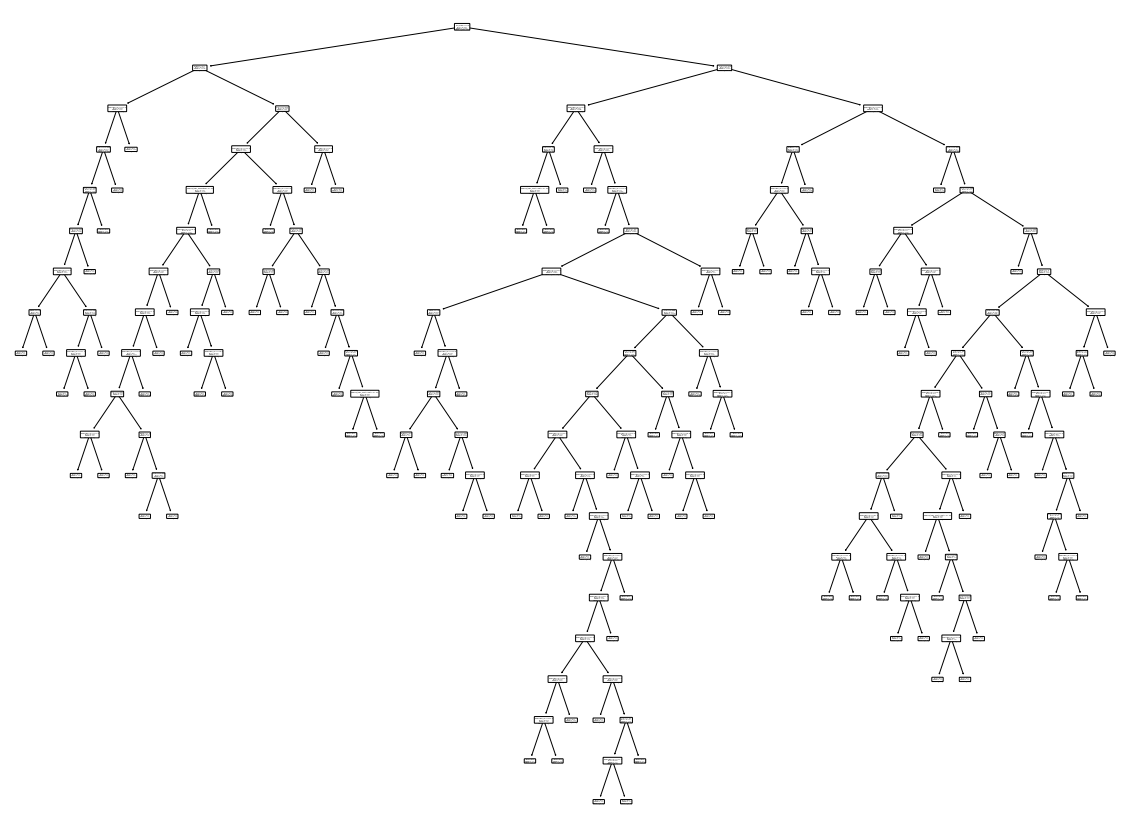

In [65]:
plt.figure(figsize = (20, 15))
plot_tree(clf, feature_names = X_train.columns, rounded = True)


### 4). Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [86]:
conf

array([[307,   0],
       [  0, 191]])

In [91]:
# Convert confusion matric into table (legibility)

conf_df = pd.DataFrame(conf, columns = ['predict_death', 'predict_survival'],
                       index = ['actual_death', 'actual_survival'])

conf_df

,predict_death,predict_survival
actual_death,307,0
actual_survival,0,191


In [90]:
# key for reference

rubric_df = pd.DataFrame([['true negative', 'false positive'],
                          ['false negative', 'true positive']], 
                         columns=['predict_death', 'predict_survive'], 
                         index=['actual_death', 'actual_survive']
                        )

rubric_df

,predict_death,predict_survive
actual_death,true negative,false positive
actual_survive,false negative,true positive


In [96]:
# Concat tables

conf_rubric = pd.concat([conf, rubric_df], axis = 1)

rubric_df + ': '+ conf_df.values.astype(str)

### 5). Run through steps 2-4 using a different max_depth value.


In [100]:
clf_dept_2 = DecisionTreeClassifier(max_depth = 2)
clf_dept_2

DecisionTreeClassifier(max_depth=2)

In [102]:
# fit Model

clf_dept_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [105]:
y_pred = clf_dept_2.predict(X_train)
y_pred 

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [112]:
# Model Accuracy
accuracy = clf_dept_2.score(X_train, y_train)
print(f'\n\tModel with max_dept ==2 accuracy: {accuracy:,.3%}')
print()


	Model with max_dept ==2 accuracy: 79.920%



### 6). Which model performs better on your in-sample data?


In [114]:
# Model II Accuracy
accuracy = clf_dept_2.score(X, y)

# Model Predictions
y_pred = clf_dept_2.predict(X)

y_prediction = clf_dept_2.predict(y, y_pred)

# Classification Report (sklearn.metrics)
class_report = pd.DataFrame(classification_report(y, y_pred, output_dict = True)).T

# Using Confusion matrix to compute data
conf = confusion_matrix(y, y_pred)
tpr = conf[1][1] / conf[1].sum()
fpr = conf[0][1] / conf[0].sum()
tnr = conf[0][0] / conf[0].sum()
fnr = conf[1][0] / conf[1].sum()

print()
print(f'''  Accuracy: {accuracy:.4%}

            True +ve: {tpr:.3%}
            
            False +ve: {fpr:.3%}
            
            True -ve: {tnr:.3%}
            
            False -ve: {fnr:.3%}
            
        '''
     )

class_report

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### 7). Which model performs best on your out-of-sample data, the validate set?


In [119]:
# Model I (max_depth = 3)

y_val_pred_1 = clf.score(validate.drop(columns = 'survived'), validate.survived)

# Model II (max_depth = 2)
y_val_pred_2 = clf_dept_2.score(validate.drop(columns = 'survived'), validate.survived)


print(f'''

        Model I : {y_val_pred_1: ,.3%}
        
        Model II : {y_val_pred_2: ,.3%}


''')



        Model I :  70.093%
        
        Model II :  76.168%





In [127]:
# Model I graph

dot_data = export_graphviz(clf, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data)

NameError: name 'graphviz' is not defined

In [125]:
graph.render('titanic_model_1_tree', view=True)


NameError: name 'graph' is not defined

In [4]:
# Model II graph

dot_data = export_graphviz(clf_dept_2, feature_names= X_train.columns, rounded=True, filled=True, out_file=None)
graph = graphviz.Source(dot_data)

NameError: name 'export_graphviz' is not defined

In [5]:
graph.render('titanic_model_2_tree', view=True)


NameError: name 'graph' is not defined

># Random Forest Exercises
>

### 1). Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

### 2). Evaluate your results using the model score, confusion matrix, and classification report.



### 3). Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

### 4). Run through steps increasing your min_samples_leaf and decreasing your max_depth.



### 5). What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?